In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential,Input,Model


In [3]:
train_data=pd.read_csv('data/train.csv').as_matrix()
test_data=pd.read_csv('data/test.csv').as_matrix()

C:\Users\lenovo\Miniconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Miniconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
(train_Y,train_X)=train_data[:,0],train_data[:,1:]
test_X=test_data[:,0:]
print(train_X.shape,test_X.shape)

(42000, 784) (28000, 784)


In [5]:
train_X=np.reshape(train_X,(-1,28,28))#reshaping 784 into 28x28
test_X=np.reshape(test_X,(-1,28,28))#reshaping 784 into 28x28

In [6]:
print("Training data shape: ",train_X.shape)
print("Testing data shape : ",test_X.shape)

Training data shape:  (42000, 28, 28)
Testing data shape :  (28000, 28, 28)


In [7]:
classes=np.unique(train_Y)
num_Classes=len(classes)
print(" The classes are : ",classes)
print("Number of classes are : ",num_Classes )

 The classes are :  [0 1 2 3 4 5 6 7 8 9]
Number of classes are :  10


Text(0.5,1,'Value for this number is : 8')

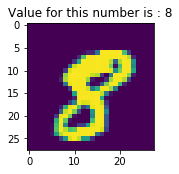

In [8]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[10,:,:])
plt.title("Value for this number is : {}".format(train_Y[10]))

# Preprocessing

In [9]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X=train_X.astype('float32')#Converting to float
test_X=test_X.astype('float32')
train_X=train_X/255.#Normalization
test_X=test_X/255.

# One Hot Encoding

In [10]:
train_y_one_hot=to_categorical(train_Y)#this function converts it into one hot vector

In [11]:
print("Before One hot encoding : ",train_Y[2])
print("AFter One hot encoding : ",train_y_one_hot[2])

Before One hot encoding :  1
AFter One hot encoding :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_y_one_hot,test_size=0.2,random_state=13)
batch_size=64
epochs=30
num_classes=10

In [14]:
from keras.preprocessing.image import ImageDataGenerator


image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

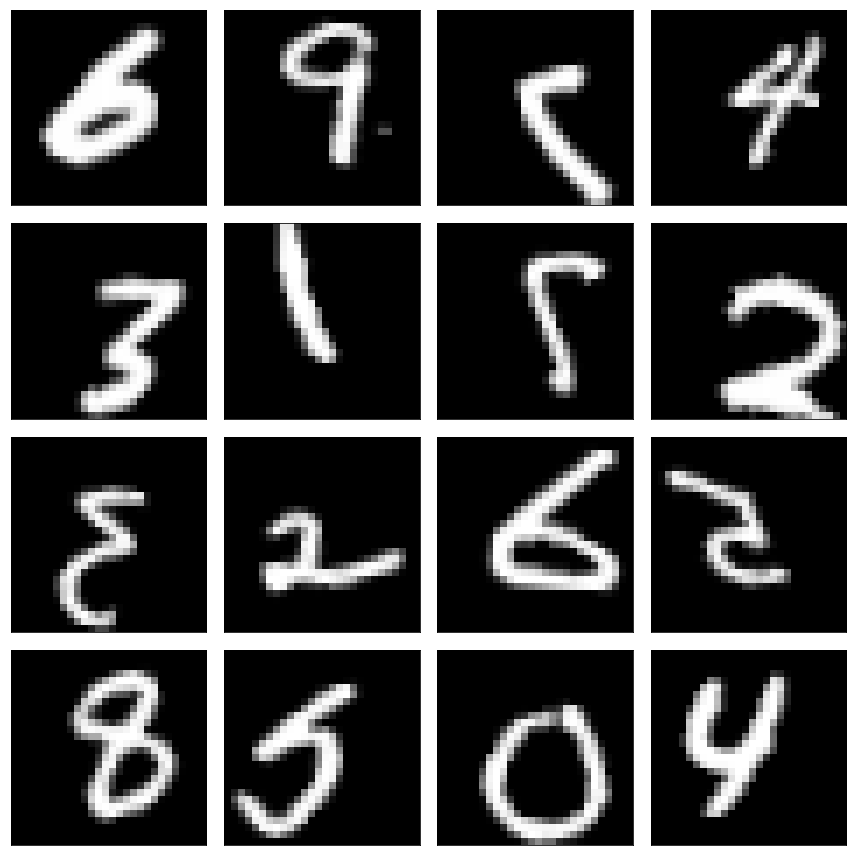

In [26]:
def plotImages( images_arr, n_images=4):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        if img.ndim != 2:
            img = img.reshape( (28,28))
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()
augmented_images, _ = next( image_gen.flow( train_X, train_label, batch_size=4*4))
plotImages(augmented_images)

In [15]:
image_gen.fit(train_X, augment=True)


AttributeError: 'numpy.ndarray' object has no attribute 'to_array'

In [18]:
num_model=Sequential()
num_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D((2, 2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
num_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))                  
num_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
num_model.add(Dropout(0.25))
num_model.add(Flatten())
num_model.add(Dense(256,activation='linear'))
num_model.add(LeakyReLU(alpha=0.1))
num_model.add(Dense(num_classes,activation='softmax'))

In [14]:
num_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
num_model_train=num_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=
                                (valid_X,valid_label))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 213s 6ms/step - loss: 0.3094 - acc: 0.8971 - val_loss: 0.0924 - val_acc: 0.9721
Epoch 2/30
33600/33600 [==============================] - 221s 7ms/step - loss: 0.0866 - acc: 0.9729 - val_loss: 0.0571 - val_acc: 0.9835
Epoch 3/30
33600/33600 [==============================] - 212s 6ms/step - loss: 0.0643 - acc: 0.9797 - val_loss: 0.0518 - val_acc: 0.9863
Epoch 4/30
33600/33600 [==============================] - 209s 6ms/step - loss: 0.0560 - acc: 0.9813 - val_loss: 0.0527 - val_acc: 0.9852
Epoch 5/30
33600/33600 [==============================] - 211s 6ms/step - loss: 0.0473 - acc: 0.9857 - val_loss: 0.0444 - val_acc: 0.9874
Epoch 6/30
33600/33600 [==============================] - 210s 6ms/step - loss: 0.0452 - acc: 0.9854 - val_loss: 0.0425 - val_acc: 0.9888
Epoch 7/30
33600/33600 [==============================] - 210s 6ms/step - loss: 0.0352 - acc: 0.9890 - val_loss: 0.0495 - v

In [15]:
predicted_class=num_model.predict(test_X)


In [16]:
predicted_classes=np.argmax(np.round(predicted_class),axis=1)

In [17]:
for i,c in enumerate(range(9,9)):
    plst.subplot(3, 3, figsize=(10, 10))
    plt.imshow(test_X[c].reshape(28,28),cmap='gray')
    plt.title("Predicted Classe is {}".format(predicted_classes[c]))
    plt.tight_layout()

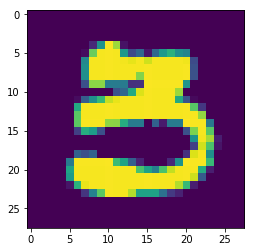

In [18]:
plt.imshow(test_X[15].reshape(28,28))

In [19]:
final_predicted_class=pd.Series(predicted_classes,name="Label")
output_csv=pd.concat([pd.Series(range(1,len(predicted_classes)+1),name="ImageId"),final_predicted_class],axis=1)


In [20]:
output_csv.to_csv("output_csv.csv",index=False)

In [21]:
print(final_predicted_class)

0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       7
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64
